In [53]:
####!/usr/bin/python3.7

import urllib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
%matplotlib inline

# daily infections in Germany
url_daily_corona = "https://opendata.arcgis.com/datasets/dd4580c810204019a7b8eb3e0b329dd6_0.csv"

# infections per 100k residents in German states
url_corona_bl_100k = "https://opendata.arcgis.com/datasets/ef4b445a53c1406892257fe63129a8ea_0.csv"

fname1 = "./RKI_covid19_daily_de.csv"
fname2 = "./RKI_covid19_states_100k.csv"
urllib.request.urlretrieve(url_daily_corona, fname1)
urllib.request.urlretrieve(url_daily_corona, fname2)

df_daily_data = pd.read_csv(fname1)

# make proper time series columns and sort df by time
time_stamps = df_daily_data['Meldedatum'].apply(lambda ts: pd.Timestamp(ts).strftime('%Y-%m-%d'))
df_daily_data['Meldedatum'] = pd.DatetimeIndex(time_stamps)
df_daily_data.sort_values(['Meldedatum'], inplace=True)

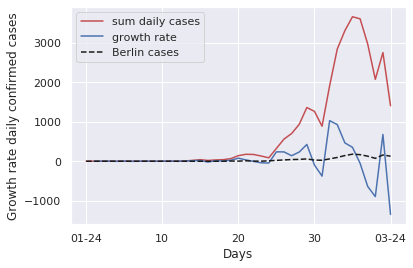

In [54]:
gr_day_reported = df_daily_data.groupby('Meldedatum')

# set plot stuff
begin_day = df_daily_data['Meldedatum'].iloc[0].strftime('%m-%d')
present_day = df_daily_data['Meldedatum'].iloc[-1].strftime('%m-%d')
days_steps = [t for t in np.arange(10,len(gr_day_reported) - 2, step=10)]
xtick_locations = [0] + days_steps + [len(gr_day_reported) - 1]
xtick_labels = [begin_day] + days_steps + [present_day]
plt.xticks(xtick_locations, xtick_labels)
plt.xlabel('Days')
plt.ylabel('Growth rate daily confirmed cases')

# Germany
sum_cases_per_day = gr_day_reported['AnzahlFall'].sum()
growth_rate = sum_cases_per_day.diff()
plt.plot(sum_cases_per_day.reset_index(drop=True), color='r')
plt.plot(growth_rate.reset_index(drop=True))

# Berlin
states_daily = df_daily_data.groupby(['Meldedatum', 'Bundesland'])['AnzahlFall'].sum()
berlin_daily = states_daily.unstack()['Berlin'].fillna(0)
plt.plot(berlin_daily.reset_index(drop=True), '--k')

plt.legend(['sum daily cases', 'growth rate', 'Berlin cases'])

In [55]:
# Get daily cases and growth rate per German state

loc_unknown_col = "-nicht erhoben-"
state_names = df_daily_data['Bundesland'].unique()
# remove column name for unknown location of the case
index = np.where(state_names == loc_unknown_col)
state_names = np.delete(state_names, index)

df_daily_data.groupby(['Meldedatum', 'Bundesland'])
states_daily = df_daily_data.groupby(['Meldedatum', 'Bundesland'])['AnzahlFall'].sum()
df_per_state_daily = pd.DataFrame()
for state in state_names:
    df_per_state_daily[state] = states_daily.unstack()[state].fillna(0)
df_per_state_daily

,Baden-Württemberg,Bayern,Niedersachsen,Nordrhein-Westfalen,Rheinland-Pfalz,Schleswig-Holstein,Hessen,Hamburg,Bremen,Brandenburg,Sachsen,Berlin,Mecklenburg-Vorpommern,Thüringen,Saarland,Sachsen-Anhalt
Meldedatum,,,,,,,,,,,,,,,,
2020-01-24,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-28,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-29,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-31,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-03,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-04,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-06,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-07,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-11,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


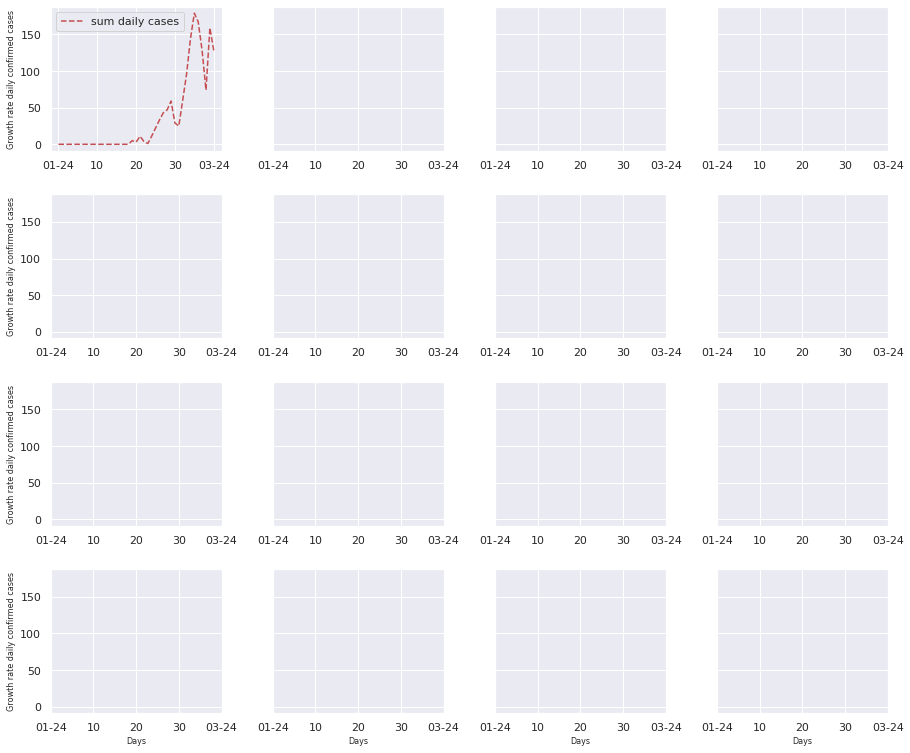

In [56]:
# Plot per German state

figsize = (15,13) # TODO: get screen size somehow
ax_label_fontsize = 8.0 # TODO: same. Make relative somehow
fig, ax = plt.subplots(4, 4, sharey=True, figsize=figsize)
fig.subplots_adjust(hspace = 0.3, wspace = 0.3)

for axis in ax.flat:
    axis.set_xticks(xtick_locations)
    axis.set_xticklabels(xtick_labels)

for plt_row in ax:
    plt_row[0].set_ylabel('Growth rate daily confirmed cases', fontsize = ax_label_fontsize)
    
for column_plots in ax.T:
    column_plots[-1].set_xlabel('Days', fontsize = ax_label_fontsize)
    
ax[0][0].plot(berlin_daily.reset_index(drop=True), '--r')
ax[0][0].legend(['sum daily cases', 'growth rate', 'Berlin cases'])